In [1]:
using FluidDynTools
using ViscousFlow
import ViscousFlow: force
using Plots

In [2]:
ρ = 1
ν = 0.002
U∞ = 1
L = 1
Re = U∞*L/ν

500.0

In [4]:
u, t, sys = load_ns_solution("FlatPlateRe500.jld2");

In [5]:
ω = ViscousFlow.vorticity(u,sys,t)
vel = ViscousFlow.velocity(u,sys,t)
ψ = ViscousFlow.streamfunction(u,sys,t);

In [6]:
ufcn, vfcn = interpolatable_field(vel,sys.base_cache.g);

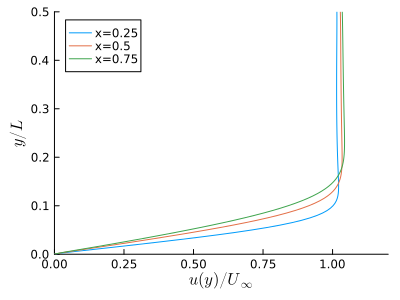

In [7]:
ysamp = range(0,0.5,length=101)
xsamp = [0.25, 0.5, 0.75]
p = plot(xlim=(0,1.2),ylim=(0,0.5),xlabel=L"u(y)/U_\infty",ylabel=L"y/L",legend=true)
for x in xsamp
    Ue = ufcn(x,0.5) # estimate of the external velocity
    plot!(p,ufcn.(x,ysamp .+ cellsize(sys)/2),ysamp,label=string("x=",x))
end
p

In [8]:
δ(x,Ue,ν) = √(2*ν*x/Ue)

δ (generic function with 1 method)

In [12]:
β = 0.0
u, η, d99, dstar, theta, Cf = falknerskan(β); # I used more descriptive symbols that C1, C2, C3, C4

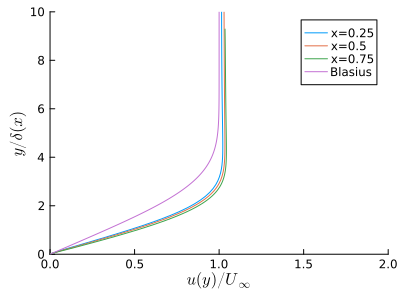

In [17]:
ysamp = range(0,0.5,length=101)
xsamp = [0.25, 0.5, 0.75]
p = plot(xlim=(0,1.2),ylim=(0,0.5),xlabel=L"u(y)/U_\infty",ylabel=L"y/δ(x)",legend=true)
for x in xsamp
    Ue = ufcn(x,0.5) # estimate of the external velocity
    plot!(p,ufcn.(x,ysamp .+ cellsize(sys)/2),ysamp/δ(x,Ue,ν),label=string("x=",x))
end
p

plot!(u,η,xlim=(0,2),ylim=(0,maximum(η)), label="Blasius")

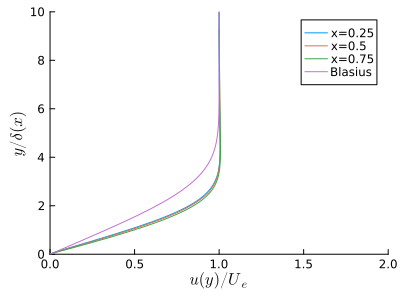

In [18]:
ysamp = range(0,0.5,length=101)
xsamp = [0.25, 0.5, 0.75]
p = plot(xlim=(0,1.2),ylim=(0,0.5),xlabel=L"u(y)/U_e",ylabel=L"y/δ(x)",legend=true)
for x in xsamp
    Ue = ufcn(x,0.5) # estimate of the external velocity
    plot!(p,ufcn.(x,ysamp .+ cellsize(sys)/2)/Ue,ysamp/δ(x,Ue,ν),label=string("x=",x))
end
p

plot!(u,η,xlim=(0,2),ylim=(0,maximum(η)), label="Blasius")